In [4]:
import os
import pandas as pd
import numpy as np
base_path = '/bigstore/binfo/mouse/Brain/Sequencing/Allen_10X_SmartSeqTypes/'
validation_genes = np.array(pd.read_csv(os.path.join(base_path,'merfish_final_genes.csv'),header=None,index_col=0).index)
dredfish_genes = np.array(pd.read_csv(os.path.join(base_path,'dredfish_filtered_genes.csv'),header=None,index_col=0).index)
dredfish_loadings= np.load(os.path.join(base_path,'24bit_DRedFISH_Loadings.npy'))

98985


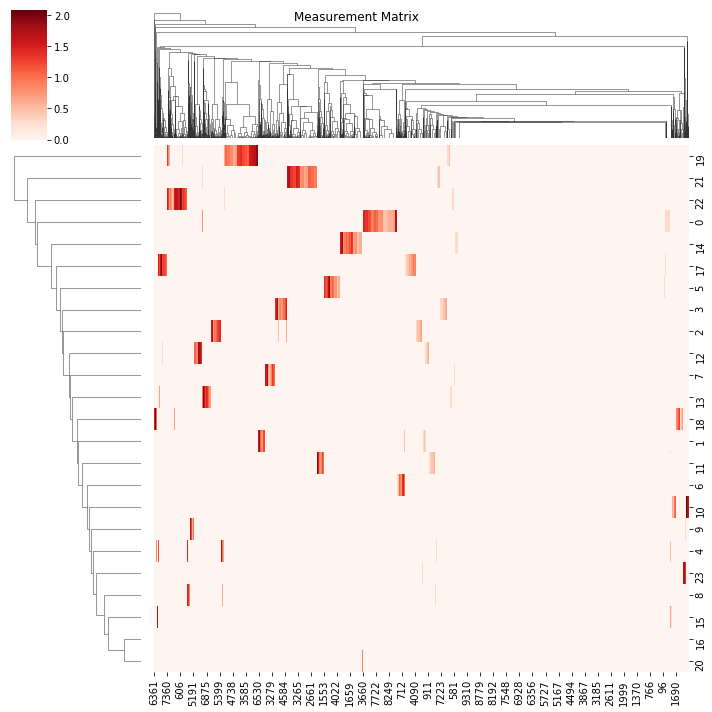

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(10000)
probes = 120*dredfish_loadings/np.max(dredfish_loadings,axis=1)[:,None]
probes = probes.astype(int)
print(np.sum(probes))
g = sns.clustermap(np.log10(probes+1),cmap="Reds")
g.fig.suptitle('Measurement Matrix')
g
plt.show()

In [7]:
np.sum(probes)

98985

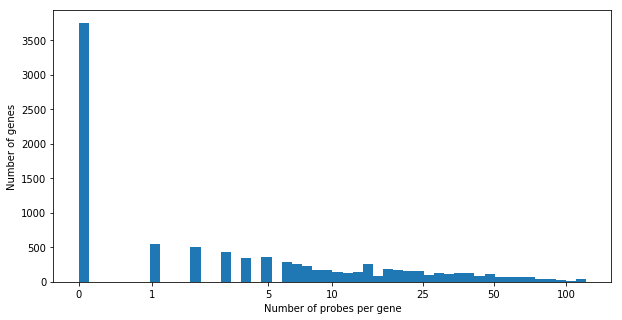

In [8]:
plt.figure(figsize=[10,5])
plt.hist(np.log10(np.sum(probes,axis=0)+1),bins=50)
plt.xticks(np.log10(np.array([0,1,5,10,25,50,100])+1),labels = [int(i) for i in np.array([0,1,5,10,25,50,100])])
plt.xlabel('Number of probes per gene')
plt.ylabel('Number of genes')
plt.show()

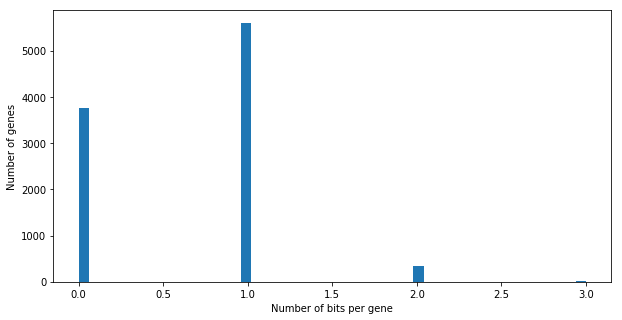

In [9]:
plt.figure(figsize=[10,5])
plt.hist(np.sum(probes>0,axis=0),bins=50)
plt.xlabel('Number of bits per gene')
plt.ylabel('Number of genes')
plt.show()

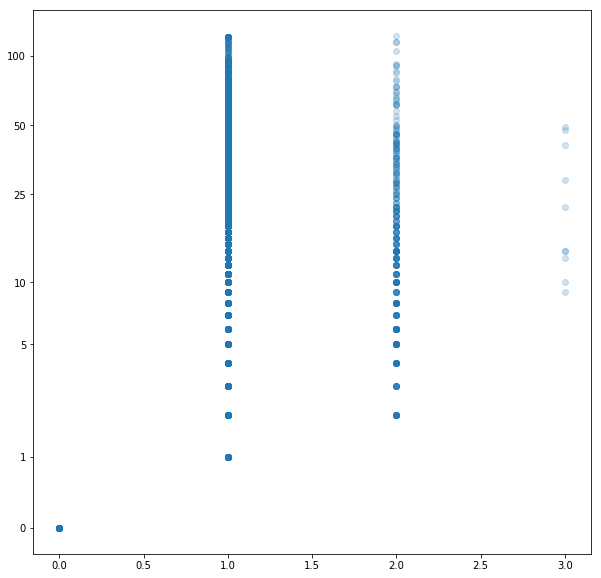

In [10]:
plt.figure(figsize=[10,10])
plt.scatter(np.sum(probes>0,axis=0),np.log10(np.sum(probes,axis=0)+1),alpha=0.2)
plt.yticks(np.log10(np.array([0,1,5,10,25,50,100])+1),labels = [int(i) for i in np.array([0,1,5,10,25,50,100])])
plt.show()

In [ ]:
"""Decide on which transcript to probe for"""

In [11]:
resource_path = '/bigstore/binfo/mouse/'
transcripts = pd.read_csv(os.path.join(resource_path,'mouse_mart_export.txt'))
transcripts

,Gene stable ID,Transcript stable ID,Transcript support level (TSL),Gene description,Gene name,Gene type,Transcript type,Source (gene),Source (transcript),Transcript name,Protein stable ID,Gene % GC content,NCBI gene description
0,ENSMUSG00000064336,ENSMUST00000082387,tslNA,mitochondrially encoded tRNA phenylalanine [So...,mt-Tf,Mt_tRNA,Mt_tRNA,insdc,insdc,mt-Tf-201,NaN,30.88,NaN
1,ENSMUSG00000064337,ENSMUST00000082388,tslNA,mitochondrially encoded 12S rRNA [Source:MGI S...,mt-Rnr1,Mt_rRNA,Mt_rRNA,insdc,insdc,mt-Rnr1-201,NaN,35.81,NaN
2,ENSMUSG00000064338,ENSMUST00000082389,tslNA,mitochondrially encoded tRNA valine [Source:MG...,mt-Tv,Mt_tRNA,Mt_tRNA,insdc,insdc,mt-Tv-201,NaN,39.13,NaN
3,ENSMUSG00000064339,ENSMUST00000082390,tslNA,mitochondrially encoded 16S rRNA [Source:MGI S...,mt-Rnr2,Mt_rRNA,Mt_rRNA,insdc,insdc,mt-Rnr2-201,NaN,35.40,NaN
4,ENSMUSG00000064340,ENSMUST00000082391,tslNA,mitochondrially encoded tRNA leucine 1 [Source...,mt-Tl1,Mt_tRNA,Mt_tRNA,insdc,insdc,mt-Tl1-201,NaN,44.00,NaN
5,ENSMUSG00000064341,ENSMUST00000082392,tslNA,mitochondrially encoded NADH dehydrogenase 1 [...,mt-Nd1,protein_coding,protein_coding,insdc,insdc,mt-Nd1-201,ENSMUSP00000080991,37.62,NADH dehydrogenase subunit 1
6,ENSMUSG00000064342,ENSMUST00000082393,tslNA,mitochondrially encoded tRNA isoleucine [Sourc...,mt-Ti,Mt_tRNA,Mt_tRNA,insdc,insdc,mt-Ti-201,NaN,27.54,NaN
7,ENSMUSG00000064343,ENSMUST00000082394,tslNA,mitochondrially encoded tRNA glutamine [Source...,mt-Tq,Mt_tRNA,Mt_tRNA,insdc,insdc,mt-Tq-201,NaN,36.62,NaN
8,ENSMUSG00000064344,ENSMUST00000082395,tslNA,mitochondrially encoded tRNA methionine [Sourc...,mt-Tm,Mt_tRNA,Mt_tRNA,insdc,insdc,mt-Tm-201,NaN,44.93,NaN
9,ENSMUSG00000064345,ENSMUST00000082396,tslNA,mitochondrially encoded NADH dehydrogenase 2 [...,mt-Nd2,protein_coding,protein_coding,insdc,insdc,mt-Nd2-201,ENSMUSP00000080992,35.74,NADH dehydrogenase subunit 2


In [12]:
from Bio import SeqIO
resource_path = '/bigstore/binfo/mouse/'
fasta_sequences = SeqIO.parse(open(os.path.join(resource_path,'mer_transcripts.fa')),'fasta')
sequences = []
from tqdm import tqdm
for fasta in tqdm(fasta_sequences):
    sequences.append(pd.DataFrame([str(fasta.description).split('=')[-1],str(fasta.name),str(fasta.id),str(fasta.description),len(str(fasta.seq)),str(fasta.seq)],index=['Gene name','name','id','description','length','sequence']).T)
sequences = pd.concat(sequences,ignore_index=True)
sequences.head()

125570it [02:09, 969.96it/s]


,Gene name,name,id,description,length,sequence
0,4933401J01Rik,ENSMUST00000193812,ENSMUST00000193812,ENSMUST00000193812 gene=4933401J01Rik,1070,AAGGAAAGAGGATAACACTTGAAATGTAAATAAAGAAAATACCTAA...
1,Gm26206,ENSMUST00000082908,ENSMUST00000082908,ENSMUST00000082908 gene=Gm26206,110,GTGCTTGCTTCGGCAACACATACACTAAATTTTGAACGATACAGAG...
2,Xkr4,ENSMUST00000162897,ENSMUST00000162897,ENSMUST00000162897 gene=Xkr4,4153,GCACACTACGGTCCATCTCCAACAACCGCAGTGTTGCCAGTGACCG...
3,Xkr4,ENSMUST00000159265,ENSMUST00000159265,ENSMUST00000159265 gene=Xkr4,2989,TTAGTTAAGAGCACTGACTGCTCTTGCAAAGGACCCAGGCTTGAGT...
4,Xkr4,ENSMUST00000070533,ENSMUST00000070533,ENSMUST00000070533 gene=Xkr4,3634,GCGGCGGCGGGCGAGCGGGCGCTGGAGTAGGAGCTGGGGAGCGGCG...


In [13]:
found_genes = np.array(list(set(dredfish_genes).intersection(list(sequences['Gene name'].unique()))))
print(len(found_genes))
print(len(dredfish_genes))
print(100*len(found_genes)/len(dredfish_genes),'% Found')

9537
9711
98.20821748532592 % Found


In [14]:
not_found_genes = dredfish_genes[(np.isin(dredfish_genes,found_genes)==False)]
not_found_genes

array(['Cavin2', 'Retreg2', 'Cop1', 'Catspere2', 'Flvcr1', 'Mindy3',
       'Paxx', 'Tmem250-ps', 'Brd3os', 'Kat14', 'Smim26', 'Rtf2', 'Rtl8b',
       'Rtl5', 'Nexmif', 'Rtl4', 'Nbdy', 'Bclaf3', 'Gucy1b1', 'Gucy1a1',
       'Tmem131l', 'Naxe', 'Mindy1', 'Fam241a', 'Gm30648', 'Gm5149',
       'Virma', 'Smim27', 'Dmac1', 'Gm42303', 'Fyb2', 'Gm2164', 'Cenps',
       'C1qtnf12', 'Gm30835', 'Babam2', 'Gm38413', 'Gm35911', 'Hectd4',
       'Nipsnap2', 'Gm30003', 'Mettl27', 'Gsdme', 'Mindy4', 'Tmem121b',
       'Hdhd5', 'Cdc42ep5', 'Nop53', 'Bicra', 'Dmac2', 'Gm29683',
       'Hdgfl3', 'Tlnrd1', 'Mesd', 'Cavin3', 'Mosmo', 'Gm39090',
       'Abraxas2', 'Gatd1', 'Bc1', '4930567K20Rik', 'Gm47710', 'Gm32926',
       'Gm48893', 'Gm49353', 'Gm46218', 'Gm20300', 'Afg1l', 'Gm34006',
       'Gm40652', 'Fam241b', 'Gm31763', 'AC121788.1', 'Gm34921',
       'Gm48089', 'Gm47033', 'Plpbp', 'Gm39185', 'Rex1bd', 'Trir',
       'Ripor1', 'C230057M02Rik', 'Gm48321', 'Rtraf', 'Gm30054', 'Lrmda',
       'Gm48003

In [15]:
len(not_found_genes[np.max(probes,axis=0)[np.isin(dredfish_genes,not_found_genes)]>0])

118

In [16]:
print(100*np.sum(np.max(probes,axis=0)[np.isin(dredfish_genes,not_found_genes)])/np.sum(np.max(probes,axis=0)),'% of probes')

1.0995679901254887 % of probes


In [17]:
# probes for genes that werent found
print([i for i in np.max(probes,axis=0)[(np.max(probes,axis=0)>0)&(np.isin(dredfish_genes,not_found_genes))]])

[12, 19, 6, 11, 21, 1, 4, 1, 6, 1, 3, 17, 51, 19, 9, 22, 6, 15, 5, 8, 2, 8, 9, 3, 72, 2, 2, 7, 4, 2, 14, 19, 8, 7, 34, 2, 32, 8, 10, 5, 1, 7, 2, 1, 9, 3, 1, 5, 2, 14, 4, 1, 6, 1, 6, 4, 5, 5, 2, 89, 2, 4, 2, 4, 8, 17, 2, 11, 28, 6, 5, 2, 2, 5, 8, 6, 2, 1, 3, 10, 50, 14, 8, 1, 5, 8, 15, 3, 1, 15, 2, 10, 7, 7, 16, 1, 13, 1, 2, 2, 9, 7, 1, 39, 3, 3, 4, 3, 5, 1, 8, 1, 2, 4, 3, 5, 3, 4]


In [44]:
transcripts['Transcript support level (TSL)'].unique()
"""
tsl1 – all splice junctions of the transcript are supported by at least one non-suspect mRNA
tsl2 – the best supporting mRNA is flagged as suspect or the support is from multiple ESTs
tsl3 – the only support is from a single EST
tsl4 – the best supporting EST is flagged as suspect
tsl5 – no single transcript supports the model structure
tslNA – the transcript was not analysed for one of the following reasons:
pseudogene annotation, including transcribed pseudogenes
human leukocyte antigen (HLA) transcript
immunoglobin gene transcript
T-cell receptor transcript
single-exon transcript (will be included in a future version)
"""

array(['tslNA', nan, 'tsl5', 'tsl1',
       'tsl1 (assigned to previous version 1)', 'tsl3',
       'tslNA (assigned to previous version 1)', 'tsl2',
       'tsl1 (assigned to previous version 2)',
       'tslNA (assigned to previous version 3)',
       'tsl1 (assigned to previous version 8)',
       'tsl5 (assigned to previous version 1)',
       'tsl3 (assigned to previous version 1)',
       'tslNA (assigned to previous version 2)',
       'tsl5 (assigned to previous version 8)',
       'tsl2 (assigned to previous version 2)',
       'tsl1 (assigned to previous version 14)',
       'tsl1 (assigned to previous version 7)',
       'tsl1 (assigned to previous version 6)',
       'tslNA (assigned to previous version 5)',
       'tsl1 (assigned to previous version 4)',
       'tsl1 (assigned to previous version 9)',
       'tsl1 (assigned to previous version 5)',
       'tsl5 (assigned to previous version 2)',
       'tsl1 (assigned to previous version 3)',
       'tsl2 (assigned to prev

In [18]:
def chose_best_sequence(gene_sequences):
    if len(gene_sequences)==0:
        print(gene,'Not Found in mer_transcripts.fa')
        return 'error'
    elif len(gene_sequences)==1:
        return gene_sequences['id'].iloc[0]
    else:
        # Chose shortest
        return gene_sequences.sort_values('length')['id'].iloc[0]
def chose_best_transcript(gene_transcripts):
    if np.sum(gene_transcripts['Transcript type']=='protein_coding')>0:
        gene_transcripts = gene_transcripts[gene_transcripts['Transcript type']=='protein_coding']
    if len(gene_transcripts)==1:
        return gene_transcripts['Transcript stable ID'].iloc[0]
    else:
        # if there are more than one use the best supported
        tsls = gene_transcripts['Transcript support level (TSL)'].unique()
        for tsl in ['tsl1','tsl2','tsl3','tsl4','tsl5']:
            if len([i for i in tsls if tsl in i])>0:
                gene_transcripts = gene_transcripts[gene_transcripts['Transcript support level (TSL)'].isin([i for i in tsls if tsl in i])]
                break
        if len(gene_transcripts)==0:
            raise print('Something Broke')
        elif len(gene_transcripts)==1:
            return gene_transcripts['Transcript stable ID'].iloc[0]
        else:
            return gene_transcripts.sort_values('length')['Transcript stable ID'].iloc[0]

In [19]:
filtered_sequences = sequences[np.isin(sequences['Gene name'],dredfish_genes)]
filtered_transcripts = transcripts[np.isin(transcripts['Gene name'],dredfish_genes)]

In [20]:
length = []
for tid in tqdm(filtered_transcripts['Transcript stable ID']):
    temp = filtered_sequences[np.isin(filtered_sequences['id'],tid)]['length']
    if len(temp)==0:
        length.append(0)
    else:
        length.append(temp.iloc[0])

100%|██████████| 59052/59052 [04:01<00:00, 244.70it/s]


In [21]:
filtered_transcripts['length'] = length

/home/zach/miniconda3/envs/pyspots-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
from tqdm import tqdm
isoforms = {}
gene_tids = []
transcripts_genes = filtered_transcripts['Gene name'].unique()
sequences_genes = filtered_sequences['Gene name'].unique()
for gene in tqdm(found_genes):
    gene_sequences = filtered_sequences[np.isin(filtered_sequences['Gene name'],gene)]
    tids = gene_sequences['id'].unique()
    gene_transcripts = filtered_transcripts[(np.isin(filtered_transcripts['Gene name'],gene))&(np.isin(filtered_transcripts['Transcript stable ID'],tids))&(filtered_transcripts['length']>0)]
    if len(gene_transcripts)==0:
        tid = chose_best_sequence(gene_sequences)
    elif len(gene_transcripts)==1:
        isoforms[gene] = gene_transcripts['Transcript stable ID'].iloc[0]
    else:
        tid = chose_best_transcript(gene_transcripts)
    isoforms[gene] = tid 
    gene_tids.append(tid)


100%|██████████| 6180/6180 [01:52<00:00, 54.97it/s]


In [23]:
from Bio import SeqIO
resource_path = '/bigstore/binfo/mouse/'
fasta_sequences = SeqIO.parse(open(os.path.join(resource_path,'mer_transcripts.fa')),'fasta')
sequences_ensemble = []
from tqdm import tqdm
for fasta in tqdm(fasta_sequences):
    sequences_ensemble.append(pd.DataFrame([str(fasta.description).split('=')[-1],str(fasta.name),str(fasta.id),str(fasta.description),len(str(fasta.seq)),str(fasta.seq)],index=['Gene name','name','id','description','length','sequence']).T)
sequences_ensemble = pd.concat(sequences_ensemble,ignore_index=True)
annotations_ensemble = pd.read_csv('/home/zach/Downloads/mouse_ensembl_annotations.csv')
filtered_sequences_ensemble = sequences_ensemble[np.isin(sequences_ensemble['Gene name'],dredfish_genes)]
filtered_annotations_ensemble = annotations_ensemble[np.isin(annotations_ensemble['Transcript stable ID'],filtered_sequences_ensemble['id'])]

125570it [02:11, 955.90it/s]


In [24]:
"""design new codebook with only transcripts found in sequences_ensemble"""
gname = []
gid = []
tid = []
length = []
sequence_df = filtered_sequences_ensemble
annotations_df = filtered_annotations_ensemble
for gene in tqdm(found_genes):
    gene_sequences = sequence_df[np.isin(sequence_df['Gene name'],gene)]
    if len(gene_sequences)==0:
        continue
    elif len(gene_sequences)==1:
        gene_tid = str(gene_sequences['id'].iloc[0])
        gene_length = int(gene_sequences['length'].iloc[0])
        gene_annotations = annotations_df[np.isin(annotations_df['Transcript stable ID'],gene_sequences['id'])]
        if len(gene_annotations)==0:
            gene_annotations = annotations_df[np.isin(annotations_df['Gene name'],gene)]
            if len(gene_annotations)==0:
                gene_gid = gene
            else:
                gene_gid = str(gene_annotations['Gene stable ID'].iloc[0])
        else:
            gene_gid = str(gene_annotations['Gene stable ID'].iloc[0])
    else:
        gene_annotations = annotations_df[np.isin(annotations_df['Transcript stable ID'],gene_sequences['id'])]
        if len(gene_annotations)==0:
            gene_sequences = gene_sequences.sort_values('length')
            gene_tid = str(gene_sequences['id'].iloc[0])
            gene_length = int(gene_sequences['length'].iloc[0])
            gene_annotations = annotations_df[np.isin(annotations_df['Gene name'],gene)]
            if len(gene_annotations)==0:
                gene_gid = gene
            else:
                gene_gid = str(gene_annotations['Gene stable ID'].iloc[0])
        elif len(gene_annotations)==1:
            gene_tid = str(gene_annotations['Transcript stable ID'].iloc[0])
            gene_length = int(gene_annotations['Transcript length (including UTRs and CDS)'].iloc[0])
            gene_gid = str(gene_annotations['Gene stable ID'].iloc[0])
        else:
            if np.sum(gene_annotations['Transcript type']=='protein_coding')>0:
                gene_annotations = gene_annotations[gene_annotations['Transcript type']=='protein_coding']
            if len(gene_annotations)==1:
                gene_annotations = gene_annotations[gene_annotations['Transcript type']=='protein_coding']
                gene_tid = str(gene_annotations['Transcript stable ID'].iloc[0])
                gene_length = int(gene_annotations['Transcript length (including UTRs and CDS)'].iloc[0])
                gene_gid = str(gene_annotations['Gene stable ID'].iloc[0])
            else:
                tsls = gene_annotations['Transcript support level (TSL)'].unique()
                for tsl in ['tsl1','tsl2','tsl3','tsl4','tsl5']:
                    if len([i for i in tsls if tsl in i])>0:
                        gene_annotations = gene_annotations[gene_annotations['Transcript support level (TSL)'].isin([i for i in tsls if tsl in i])]
                        break
                if len(gene_annotations)==1:
                    gene_tid = str(gene_annotations['Transcript stable ID'].iloc[0])
                    gene_length = int(gene_annotations['Transcript length (including UTRs and CDS)'].iloc[0])
                    gene_gid = str(gene_annotations['Gene stable ID'].iloc[0])
                else:
                    if np.sum(gene_annotations['RefSeq mRNA ID'].astype(str)!='nan')>1:
                        gene_annotations = gene_annotations[gene_annotations['RefSeq mRNA ID'].astype(str)!='nan']
                    if len(gene_annotations)==1:
                        gene_tid = str(gene_annotations['Transcript stable ID'].iloc[0])
                        gene_length = int(gene_annotations['Transcript length (including UTRs and CDS)'].iloc[0])
                        gene_gid = str(gene_annotations['Gene stable ID'].iloc[0])
                    else:
                        gene_annotations = gene_annotations.sort_values('Transcript length (including UTRs and CDS)')
                        gene_tid = str(gene_annotations['Transcript stable ID'].iloc[0])
                        gene_length = int(gene_annotations['Transcript length (including UTRs and CDS)'].iloc[0])
                        gene_gid = str(gene_annotations['Gene stable ID'].iloc[0])
    gname.append(gene)
    tid.append(gene_tid)
    length.append(gene_length)
    gid.append(gene_gid)

100%|██████████| 9537/9537 [03:58<00:00, 39.93it/s]


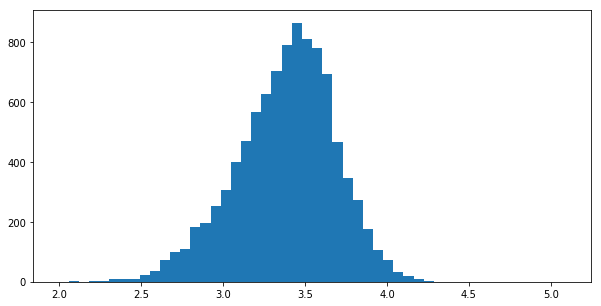

In [26]:
plt.figure(figsize=[10,5])
plt.hist(np.log10(length),bins=50)
plt.show()

In [25]:
codebook = pd.DataFrame(gname,columns=['Gene'])
codebook['Transcript_ID'] = tid
codebook['Barcode'] = '1111'.zfill(18)
codebook.head()

,Gene,Transcript_ID,Barcode
0,Urgcp,ENSMUST00000120306,000000000000001111
1,Pnrc2,ENSMUST00000180300,000000000000001111
2,Lhfpl2,ENSMUST00000118195,000000000000001111
3,Rad17,ENSMUST00000177848,000000000000001111
4,Zfp943,ENSMUST00000153985,000000000000001111


In [28]:
len(codebook)

9537

In [27]:
f = '/bigstore/binfo/mouse/disulfide_readouts.fasta'
from Bio import SeqIO
readout_names = []
with open(f) as fasta_file:  # Will close handle cleanly
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        readout_names.append(seq_record.name)
print(readout_names)

def write_codebook(rows, fname, readout_names, codebook_style = '148MHD4'):
    with open(fname, 'w') as f:
        f.write('version'+','+str(1)+'\n')
        f.write('codebook_name'+','+codebook_style+'\n')
        f.write('bit_names,'+','.join(readout_names)+'\n')
        f.write('name, id, barcode\n')
        for row in rows:
            f.write(','.join([str(row[0]), str(row[1]), str(row[2])+'\n']))
row_tuples = []
for idx, row in codebook.iterrows():
    if len(row['Transcript_ID'].split('.')[0])>0:
        row_tuples.append((row['Gene'], row['Transcript_ID'], str(row['Barcode']).zfill(18)))
if not os.path.exists('/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/results/DRedFISH'):
    os.mkdir('/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/results/DRedFISH')
write_codebook(row_tuples, '/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/results/DRedFISH/DRedFISH_Codebook_V3.txt', readout_names)
row_tuples

['RS0095', 'RS0109', 'RS0175', 'RS0237', 'RS0307', 'RS0332', 'RS0384', 'RS0406', 'RS0451', 'RS0468', 'RS0548', 'RS64.0', 'RS156.0', 'RS278.0', 'RS313.0', 'RS643.0', 'RS740.0', 'RS810.0']


[('Urgcp', 'ENSMUST00000120306', '000000000000001111'),
 ('Pnrc2', 'ENSMUST00000180300', '000000000000001111'),
 ('Lhfpl2', 'ENSMUST00000118195', '000000000000001111'),
 ('Rad17', 'ENSMUST00000177848', '000000000000001111'),
 ('Zfp943', 'ENSMUST00000153985', '000000000000001111'),
 ('Myo1d', 'ENSMUST00000070997', '000000000000001111'),
 ('Zfp334', 'ENSMUST00000103084', '000000000000001111'),
 ('Rhobtb2', 'ENSMUST00000022665', '000000000000001111'),
 ('Dlst', 'ENSMUST00000053811', '000000000000001111'),
 ('Gatad1', 'ENSMUST00000119783', '000000000000001111'),
 ('Cd52', 'ENSMUST00000000696', '000000000000001111'),
 ('Far2', 'ENSMUST00000111607', '000000000000001111'),
 ('Thrap3', 'ENSMUST00000080919', '000000000000001111'),
 ('Tmem201', 'ENSMUST00000103208', '000000000000001111'),
 ('Cluh', 'ENSMUST00000092915', '000000000000001111'),
 ('Akap8l', 'ENSMUST00000050214', '000000000000001111'),
 ('Uggt2', 'ENSMUST00000173391', '000000000000001111'),
 ('Cycs', 'ENSMUST00000161401', '000000000

In [ ]:
""" Design Probes """

In [8]:
"""Simulated Compressed"""
metadata = pd.read_csv(os.path.join(base_path,'sorted_metadata.csv'),index_col=0)
metadata

/home/zach/miniconda3/envs/pyspots-gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,exp_component_name,platform_label,cluster_color,cluster_order,cluster_label,class_color,class_order,class_label,subclass_color,subclass_order,...,injection_roi_color,injection_roi_id,injection_roi_label,injection_type_color,injection_type_id,injection_type_label,cortical_layer_label,outlier_call,outlier_type,counts_loc
sample_name,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAAACGCC-L8TX_180221_01_F09,AAACCTGAGAAACGCC-1L8TX_180221_01_F09,10x,#02F970,183.0,183_L2/3 IT CTX,#00ADEE,2.0,Glutamatergic,#0BE652,15.0,...,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN,0
AAACCTGAGAAGGTTT-L8TX_180221_01_F09,AAACCTGAGAAGGTTT-1L8TX_180221_01_F09,10x,#02F970,183.0,183_L2/3 IT CTX,#00ADEE,2.0,Glutamatergic,#0BE652,15.0,...,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN,1
AAACCTGAGAGTAATC-L8TX_180221_01_F09,AAACCTGAGAGTAATC-1L8TX_180221_01_F09,10x,#09CCC6,197.0,197_L4/5 IT CTX,#00ADEE,2.0,Glutamatergic,#00E5E5,17.0,...,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN,2
AAACCTGAGCCTTGAT-L8TX_180221_01_F09,AAACCTGAGCCTTGAT-1L8TX_180221_01_F09,10x,#2E8CCB,327.0,327_L6 CT CTX,#00ADEE,2.0,Glutamatergic,#2D8CB8,33.0,...,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN,3
AAACCTGAGTGGTAAT-L8TX_180221_01_F09,AAACCTGAGTGGTAAT-1L8TX_180221_01_F09,10x,#45BE72,304.0,304_L5 NP CTX,#00ADEE,2.0,Glutamatergic,#3E9E64,30.0,...,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN,4
AAACCTGCAAGCTGTT-L8TX_180221_01_F09,AAACCTGCAAGCTGTT-1L8TX_180221_01_F09,10x,#B1EC30,186.0,186_L2 IT RSP-ACA,#00ADEE,2.0,Glutamatergic,#B1EC30,16.0,...,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN,5
AAACCTGCACAGGAGT-L8TX_180221_01_F09,AAACCTGCACAGGAGT-1L8TX_180221_01_F09,10x,#09CCC6,197.0,197_L4/5 IT CTX,#00ADEE,2.0,Glutamatergic,#00E5E5,17.0,...,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN,6
AAACCTGCACGTCTCT-L8TX_180221_01_F09,AAACCTGCACGTCTCT-1L8TX_180221_01_F09,10x,#935F50,3.0,3_Lamp5 Lhx6,#F05A28,1.0,GABAergic,#DA808C,3.0,...,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN,7
AAACCTGCACTTAACG-L8TX_180221_01_F09,AAACCTGCACTTAACG-1L8TX_180221_01_F09,10x,#02F970,183.0,183_L2/3 IT CTX,#00ADEE,2.0,Glutamatergic,#0BE652,15.0,...,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN,8


In [ ]:
counts = np.load(os.path.join(base_path,'normcounts.npy')).astype('float32')

In [ ]:
probes = probes.astype('float32')

In [ ]:
compressed = np.matmul(counts,probes.T)

In [21]:
def find_next_nodes(node):
    if 'leaf_attributes' in node.keys():
        A = None
        B = None
        C = node['leaf_attributes'][0]['original_label']
        H = node['leaf_attributes'][0]['height']
        Children = []
    elif 'node_attributes' in node.keys():
        try:
            A = node['children'][0]['node_attributes'][0]['original_label']
        except:
            A = node['children'][0]['leaf_attributes'][0]['original_label']
        try:
            B = node['children'][1]['node_attributes'][0]['original_label']
        except:
            B = node['children'][1]['leaf_attributes'][0]['original_label']
        C = node['node_attributes'][0]['original_label']
        H = node['node_attributes'][0]['height']
        Children = node['children']
    return A,B,C,H,Children
def dend2linkage(dend):
    A_list = []
    B_list = []
    C_list = []
    H_list = []
    Children_list = []
    A,B,C,H,Children = find_next_nodes(dend)
    A_list.append(A)
    B_list.append(B)
    C_list.append(C)
    H_list.append(H)
    Children_list.extend(Children)
    while len(Children_list)>0:
        new_Children_list = []
        for child in Children_list:
            A,B,C,H,Children = find_next_nodes(child)
            A_list.append(A)
            B_list.append(B)
            C_list.append(C)
            H_list.append(H)
            new_Children_list.extend(Children)
        Children_list = new_Children_list
    linkage = pd.DataFrame()
    linkage['A'] = A_list
    linkage['B'] = B_list
    linkage['C'] = C_list
    linkage['H'] = H_list
    linkage = linkage.sort_values('H')
    return linkage
""" node by leaf matrix"""
def linkage_to_nodeleaf(linkage):
    leaves = np.array(linkage[linkage['H']==0]['C'])
    nodes = np.array(linkage[linkage['H']!=0]['C'])
    leaf_idx_converter = {leaf:i for i,leaf in enumerate(leaves)}
    node_idx_converter = {node:i for i,node in enumerate(nodes)}
    presence_matrix = np.zeros((len(leaves),len(nodes)))
    for leaf in tqdm(leaves):
        i = leaf_idx_converter[leaf]
        next_node = np.array(linkage[(linkage['A']==leaf)|(linkage['B']==leaf)]['C'])
        while next_node.shape[0]>0:
            presence_matrix[i,node_idx_converter[next_node[0]]] = 1
            next_node = np.array(linkage[(linkage['A']==next_node[0])|(linkage['B']==next_node[0])]['C'])
    node2leaf_df = pd.DataFrame(presence_matrix,index=leaves,columns=nodes)
    return node2leaf_df
def calculate_ROC(linkage,true,predicted):
    accuracy = []
    present_leaves = np.unique(true)
    leaves = np.array(linkage[linkage['H']==0]['C'])
    absent_leaves = leaves[np.isin(leaves,present_leaves)==False]
    temp_linkage = linkage[np.isin(np.array(linkage['C']),absent_leaves)==False]
    tp_h = np.zeros(true.shape[0])
    for h in tqdm(temp_linkage['H'].unique()):
        for ct in temp_linkage[temp_linkage['H']==h]['C']:
            if ct in leaves:
                tp_h[np.isin(true,np.array(ct))&np.isin(predicted,np.array(ct))] = 1
            else:
                node_leaves = leaves[np.array(node2leaf_df[ct])==1]
                tp_h[np.isin(true,node_leaves)&np.isin(predicted,node_leaves)] = 1
        accuracy.append(np.sum(tp_h)/tp_h.shape[0])
    return np.array(accuracy), np.array(linkage['H'].unique())
def calculate_AUC(linkage,true,predicted):
    test_a,test_h = calculate_ROC(linkage,true,predicted)
    shuffled = true.copy()
    np.random.shuffle(shuffled)
    perm_a,perm_h = calculate_ROC(linkage,true,shuffled)
    auc = np.trapz(test_a,perm_a)/np.trapz(np.ones_like(perm_a),perm_a)
    accuracy = len([i for i in range(predicted.shape[0]) if predicted[i]==true[i]])/predicted.shape[0]
    return auc,accuracy
import seaborn as sns
def show_confusion_matrix(unique_labels,true,predicted):
    label_converter = {label:i for i,label in enumerate(unique_labels)}
    label_converter[np.nan]=-1
    true_converted = np.array([label_converter[i] for i in true])
    predicted_converted = np.array([label_converter[i] for i in predicted])
    confmat = np.zeros((len(unique_labels),len(unique_labels)))
    for i,it in enumerate(unique_labels):
        it_converted = label_converter[it]
        for j,jt in enumerate(unique_labels):
            jt_converted = label_converter[jt]
            confmat[i,j] = np.sum((true_converted==it_converted)&(predicted_converted==jt_converted))/np.sum((true_converted==it_converted))
    confmat = pd.DataFrame(confmat,index=unique_labels,columns=unique_labels)
    plt.figure(figsize=[10,10])
    sns.heatmap(confmat,cmap='Reds')
    plt.show()

In [12]:
import json
from tqdm import tqdm
with open(os.path.join(base_path,'dend.json')) as f:
    dend = json.load(f)
linkage = dend2linkage(dend)
node2leaf_df = linkage_to_nodeleaf(linkage)

100%|██████████| 379/379 [00:14<00:00, 26.44it/s]


In [15]:
metadata.shape

(1093023, 57)

In [16]:
compressed.shape

(1093023, 24)

In [46]:
# Generate test train set
labels = np.array(metadata['cell_type_alias_label'])
all_indexes = np.where(labels.astype(str)!='nan')[0]
unqtypes = np.unique(labels[all_indexes].astype(str))
ncells = len(all_indexes)
test_indexes = np.random.choice(all_indexes,int(0.25*ncells))
train_indexes = all_indexes[(np.isin(all_indexes,test_indexes)==False)]
test_counts = compressed[test_indexes,:]
train_counts = compressed[train_indexes,:]
test_labels = labels[test_indexes]
train_labels = labels[train_indexes]
print('test:',test_counts.shape,'train:',train_counts.shape)

test: (272252, 24) train: (848087, 24)


100%|██████████| 298/298 [01:39<00:00,  3.00it/s]


(0.9622231204151667, 0.5970571382395722)


/home/zach/miniconda3/envs/pyspots-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in long_scalars


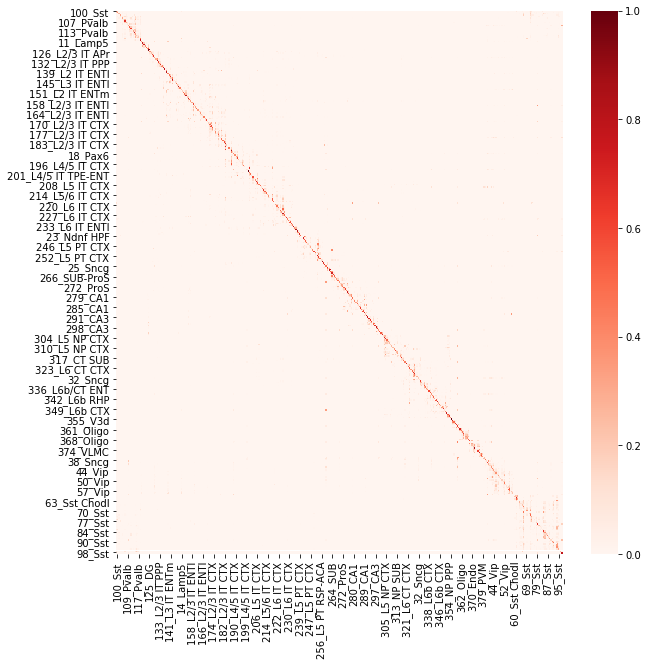

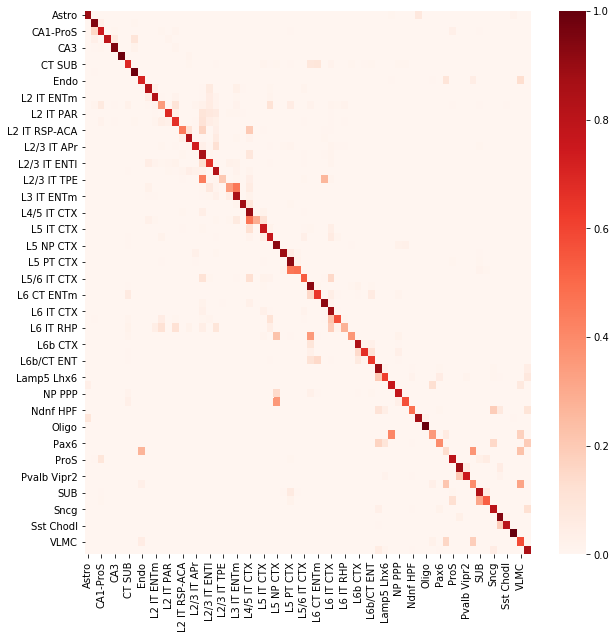

In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(train_counts,train_labels)
predicted = lda.predict(test_counts)

print(calculate_AUC(linkage,test_labels,predicted))
show_confusion_matrix(unqtypes,test_labels,predicted)
show_confusion_matrix(np.unique([i.split('_')[1] for i in unqtypes]),np.array([i.split('_')[1] for i in test_labels]),np.array([i.split('_')[1] for i in predicted]))

In [ ]:
dredfish_genes[np.max(probes,axis=0)>0]

In [79]:
len(set(list(dredfish_genes)).intersection(list(validation_genes)))

75

In [201]:
# Parse Fasta
f = '/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/results/DRedFISH/V1.5/DRedFISH_possible_oligos.fasta'
from Bio import SeqIO
with open(f) as fasta_file:  # Will close handle cleanly
    gene = []
    tid = []
    seqs = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        name = seq_record.description.split(' ')
        seqs.append(str(seq_record.seq))
#         for i in name:
#             if 'ENS' in i:
#                 gene.append(i.split('_')[0])
#                 gid.append(i.split('_')[2])
        des = ''
        for i in seq_record.description.split(' '):
            if len(i)>len(des):
                des=i
        gene.append(des.split('__')[0])
        tid.append(des.split('__')[1])
fasta = pd.DataFrame(columns = ['gene','transcript_ID','sequence'])
fasta['gene'] = gene
fasta['transcript_ID'] = tid
fasta['sequence'] = seqs
fasta

,gene,transcript_ID,sequence
0,Kdm4a,ENSMUST00000050288,GTATAAGGTGATTGGTGGTGACATCTTGTCTTCTCTGTTTTTGAGG...
1,Kdm4a,ENSMUST00000050288,GTATAAGGTGATTGGTGGTGAGGTTAGTAGGTTGTGGTGTTACTGG...
2,Kdm4a,ENSMUST00000050288,GAGTGTGTGTTAAGGTAGGTATCATCTGCAACCTCTGCCAGCTCCT...
3,Kdm4a,ENSMUST00000050288,GTATAAGGTGATTGGTGGTGATTTGGCAAGACGCTCCAGGCGTTTC...
4,Kdm4a,ENSMUST00000050288,GGTTAGTAGGTTGTGGTGTTAGAATTGCCACTGCACATGAAACATG...
5,Kdm4a,ENSMUST00000050288,GTATAAGGTGATTGGTGGTGAGGGGTATTTCCAGACAGACTCTGTG...
6,Kdm4a,ENSMUST00000050288,GAGTGTGTGTTAAGGTAGGTAGTGAGCTTGCATCCTGAACTAGATG...
7,Kdm4a,ENSMUST00000050288,GGAGTAGGTTGATGTGTAGTAGAGTGTGTGTTAAGGTAGGTACTGA...
8,Kdm4a,ENSMUST00000050288,GAGTGTGTGTTAAGGTAGGTAGTCTCGGTGGTGAGTCTGACCACCT...
9,Kdm4a,ENSMUST00000050288,GTATAAGGTGATTGGTGGTGATTCTTATTCTCCTCCAGGGAAAGCA...


In [211]:
probe_counts = Counter(fasta['gene'])
not_found = [gene for gene in found_genes if not gene in probe_counts.keys()]
print(len(not_found))
sequences[np.isin(sequences['Gene name'],'Gm206071')]

1133


,Gene name,name,id,description,length,sequence


In [ ]:
""" tRegion Empty"""

In [208]:
not_found[-1]

'Gm20671'

In [146]:
import pandas as pd

fpkm = pd.read_csv(os.path.join(resource_path,'Cornea_FPKM.csv'))
fpkm.head()

,transcript_id,class_code,nearest_ref_id,gene_id,gene_short_name,tss_id,locus,length,coverage,FPKM,FPKM_conf_lo,FPKM_conf_hi,FPKM_status
0,ENSMUST00000182774,-,-,ENSMUSG00000098104,RP23-34E15.1,-,chr1:4687933-4689403,1470,12.410100,3.988990,3.531150,4.446840,OK
1,ENSMUST00000193443,-,-,ENSMUSG00000102175,RP23-34E15.2,-,chr1:4692218-4693424,1206,0.517597,0.166372,0.057822,0.274922,OK
2,ENSMUST00000157708,-,-,ENSMUSG00000088333,Gm27396,-,chr1:3783875-3783933,58,0.000000,0.000000,0.000000,0.000000,OK
3,ENSMUST00000195771,-,-,ENSMUSG00000104328,RP23-37D15.1,-,chr1:4583128-4586252,2773,0.000000,0.000000,0.000000,0.000000,OK
4,ENSMUST00000082908,-,-,ENSMUSG00000064842,Gm26206,-,chr1:3102015-3102125,110,0.000000,0.000000,0.000000,0.000000,OK


In [154]:
gene_fpkm = fpkm[np.isin(fpkm['transcript_id'],gene_tids)]

In [155]:
gene_fpkm.head()

,transcript_id,class_code,nearest_ref_id,gene_id,gene_short_name,tss_id,locus,length,coverage,FPKM,FPKM_conf_lo,FPKM_conf_hi,FPKM_status
23,ENSMUST00000191939,-,-,ENSMUSG00000025902,Sox17,-,chr1:4492464-4493735,840,0.000000,0.000000,0.00000,0.000000,OK
112,ENSMUST00000193732,-,-,ENSMUSG00000097797,RP24-263A16.1,-,chr1:7375887-7397869,631,0.239019,0.076828,0.00000,0.210772,OK
126,ENSMUST00000044369,-,-,ENSMUSG00000033793,Atp6v1h,-,chr1:5083079-5162529,2049,50.493300,16.230200,15.02340,17.436900,OK
149,ENSMUST00000159530,-,-,ENSMUSG00000025907,Rb1cc1,-,chr1:6262932-6274489,898,8.734750,2.807630,2.11790,3.497350,OK
156,ENSMUST00000182114,-,-,ENSMUSG00000051285,Pcmtd1,-,chr1:7088929-7169598,770,5.714160,1.836710,1.19399,2.479430,OK


In [170]:

tid = gene_tids[0]
filtered_transcripts[filtered_transcripts['Transcript stable ID']==tid]

,Gene stable ID,Transcript stable ID,Transcript support level (TSL),Gene description,Gene name,Gene type,Transcript type,Source (gene),Source (transcript),Transcript name,Protein stable ID,Gene % GC content,NCBI gene description,length
45510,ENSMUSG00000033326,ENSMUST00000050288,tsl1,lysine (K)-specific demethylase 4A [Source:MGI...,Kdm4a,protein_coding,protein_coding,ensembl_havana,ensembl_havana,Kdm4a-201,ENSMUSP00000062910,49.88,lysine (K)-specific demethylase 4A,3279


In [175]:
seq

Gene name                                          4933401J01Rik
name                                          ENSMUST00000193812
id                                            ENSMUST00000193812
description                ENSMUST00000193812 gene=4933401J01Rik
length                                                      1070
sequence       AAGGAAAGAGGATAACACTTGAAATGTAAATAAAGAAAATACCTAA...
Name: 0, dtype: object

In [180]:
gene_fpkm.iloc[0]

transcript_id        ENSMUST00000191939
class_code                            -
nearest_ref_id                        -
gene_id              ENSMUSG00000025902
gene_short_name                   Sox17
tss_id                                -
locus              chr1:4492464-4493735
length                              840
coverage                              0
FPKM                                  0
FPKM_conf_lo                          0
FPKM_conf_hi                          0
FPKM_status                          OK
Name: 23, dtype: object

In [185]:
temp = filtered_transcripts[np.isin(filtered_transcripts['Transcript stable ID'],tid)]
if len(temp)>0:
    gid = temp['Gene stable ID'].iloc[0]
else:
    gid = tid

,Gene stable ID,Transcript stable ID,Transcript support level (TSL),Gene description,Gene name,Gene type,Transcript type,Source (gene),Source (transcript),Transcript name,Protein stable ID,Gene % GC content,NCBI gene description,length
45510,ENSMUSG00000033326,ENSMUST00000050288,tsl1,lysine (K)-specific demethylase 4A [Source:MGI...,Kdm4a,protein_coding,protein_coding,ensembl_havana,ensembl_havana,Kdm4a-201,ENSMUSP00000062910,49.88,lysine (K)-specific demethylase 4A,3279


In [198]:
blank_fpkm = []
for i,seq in tqdm(sequences.iterrows(),total=len(sequences)):
    tid = seq['id']
    gname = seq['Gene name']
    gid = gname
    locus = '-'
    length = seq['length']
    data = [tid,'-','-',gid,gname,'-',locus,length,1,1,1,1,'OK']
    blank_fpkm.append(pd.DataFrame(data,index=gene_fpkm.columns).T)
blank_fpkm_df = pd.concat(blank_fpkm,ignore_index=True)

100%|██████████| 125570/125570 [01:55<00:00, 1086.47it/s]


In [199]:
blank_fpkm_df.head()

,transcript_id,class_code,nearest_ref_id,gene_id,gene_short_name,tss_id,locus,length,coverage,FPKM,FPKM_conf_lo,FPKM_conf_hi,FPKM_status
0,ENSMUST00000193812,-,-,4933401J01Rik,4933401J01Rik,-,-,1070,1,1,1,1,OK
1,ENSMUST00000082908,-,-,Gm26206,Gm26206,-,-,110,1,1,1,1,OK
2,ENSMUST00000162897,-,-,Xkr4,Xkr4,-,-,4153,1,1,1,1,OK
3,ENSMUST00000159265,-,-,Xkr4,Xkr4,-,-,2989,1,1,1,1,OK
4,ENSMUST00000070533,-,-,Xkr4,Xkr4,-,-,3634,1,1,1,1,OK


In [200]:
blank_fpkm_df.to_csv(os.path.join(resource_path,'empty_expression.csv'),index=False)